In [70]:
import pandas as pd
import numpy as np

df=pd.read_csv('rETH_market_price.csv')
df.head()

,Unnamed: 0,reth_fair_value,reth_market_price,reth_premium,time
0,0,1.067560,1.067438,0.999886,2023-04-25T17:40:47Z
1,1,1.067560,1.067438,0.999886,2023-04-25T17:20:35Z
2,2,1.067560,1.067438,0.999886,2023-04-25T17:19:11Z
3,3,1.067435,1.067438,1.000003,2023-04-25T15:54:47Z
4,4,1.067435,1.067438,1.000003,2023-04-25T15:50:35Z


In [71]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import networkx as nx
format_k = lambda x, pos: f'{x/10**3:,.0f}K'

plt.style.use('https://raw.githubusercontent.com/benckj/mpl_style/main/uzh.mplstyle')

Text(0.5, 1.0, 'rETH premium')

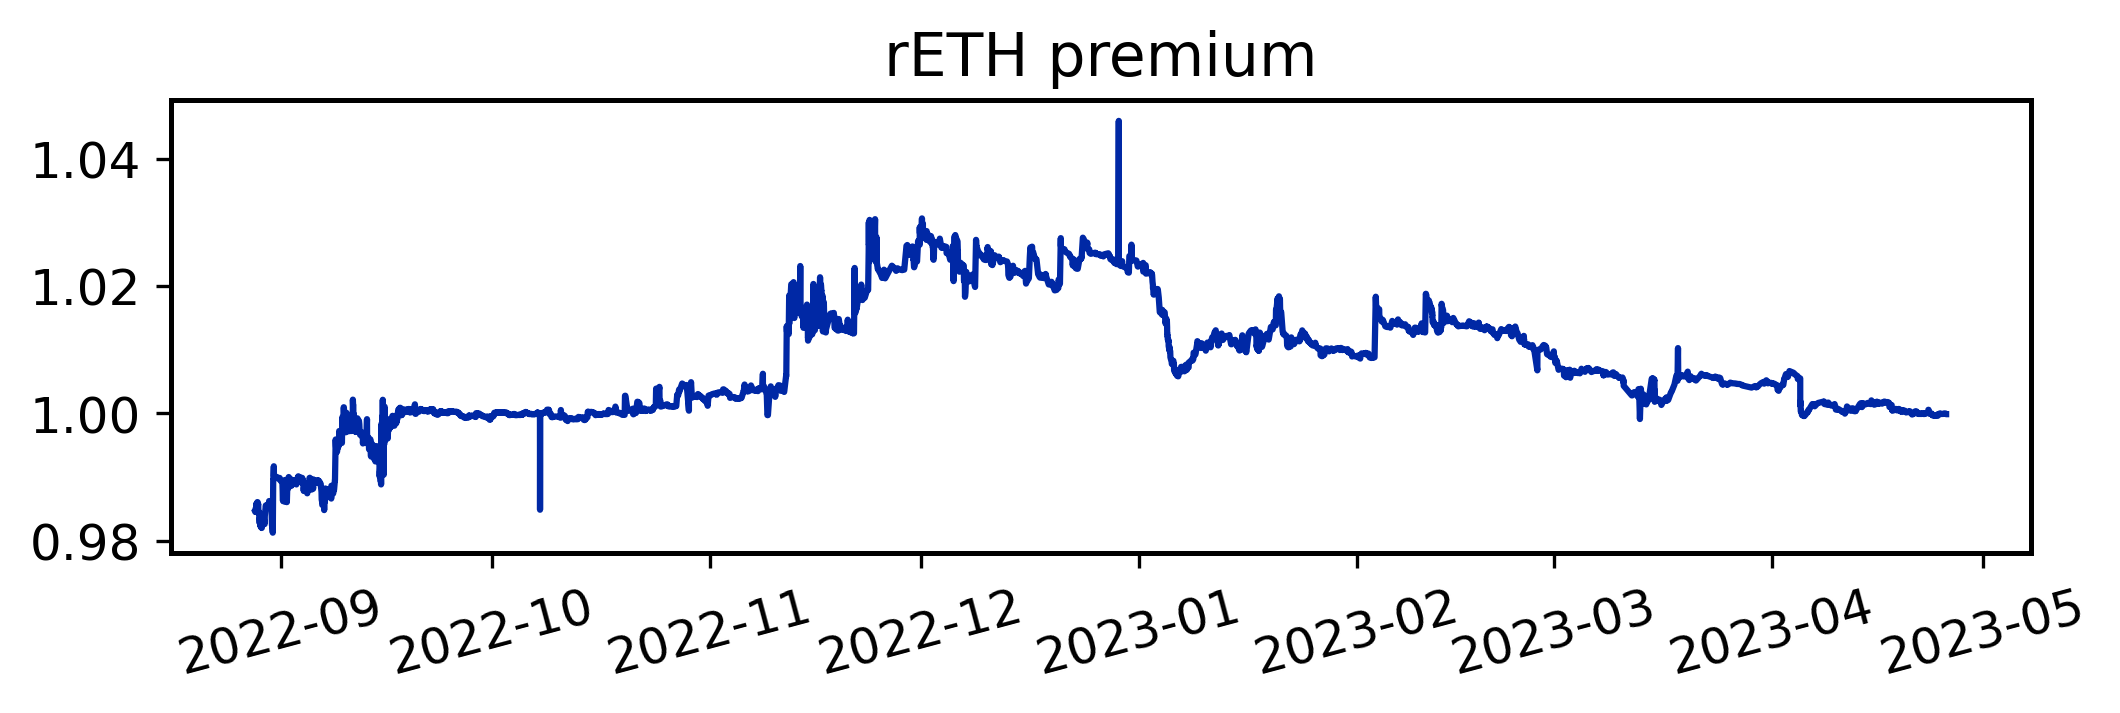

In [72]:
import matplotlib.pyplot as plt
df['time']=pd.to_datetime(df['time'])
df=df.set_index('time')
fig = plt.figure(figsize=(8, 2))
plt.plot(df['reth_premium'])
plt.xticks(rotation=15)
plt.title('rETH premium')


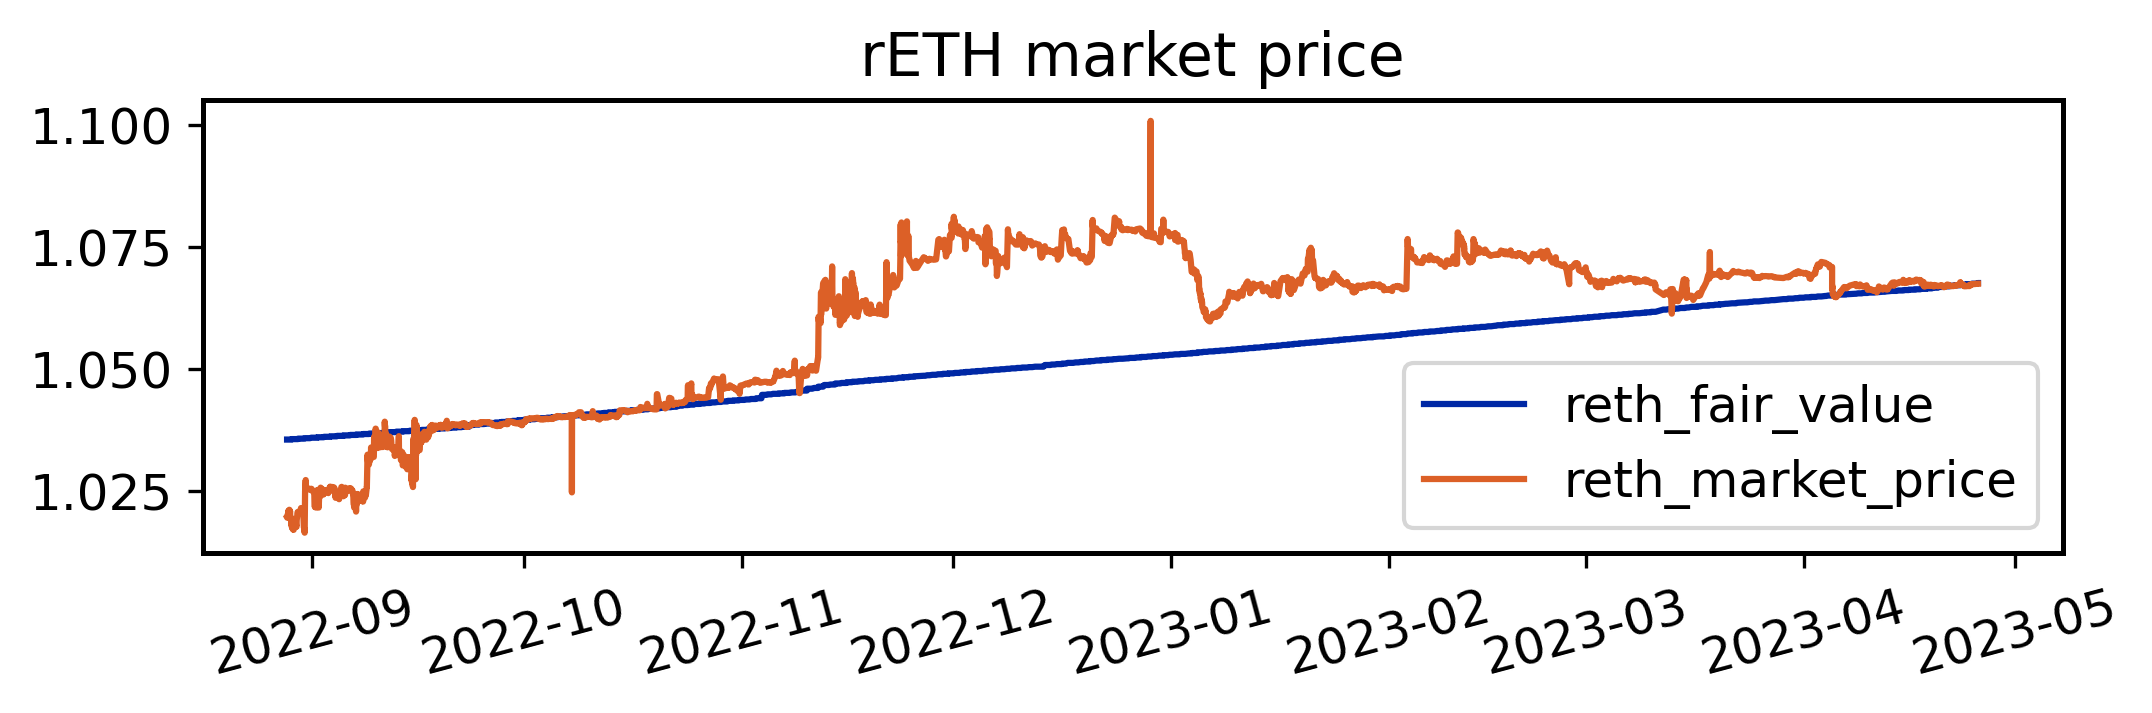

In [73]:
fig = plt.figure(figsize=(8, 2))
plt.plot(df['reth_fair_value'], label='reth_fair_value')
plt.plot(df['reth_market_price'],label='reth_market_price')
plt.xticks(rotation=15)
plt.legend()
plt.title('rETH market price')
plt.show()

In [77]:
def transform_to_daily(df, col):
   df = df.copy()
   df = df.sort_index()
   days_ = [str(date) for date in sorted(set(df.index.date.tolist()))]
   df_daily = {}
   for day in days_:
      df_daily[day]={} 
      df_daily[day]['open']=df.loc[day][col][0]
      df_daily[day]['close']=df.loc[day][col][-1]
      df_daily[day]['high']=df.loc[day][col].max()
      df_daily[day]['min']=df.loc[day][col].min()
   df_daily = pd.DataFrame.from_dict(df_daily, orient='index')
   df_daily.index = pd.to_datetime(df_daily.index)
   return df_daily


In [78]:
df.columns

Index(['Unnamed: 0', 'reth_fair_value', 'reth_market_price', 'reth_premium'], dtype='object')

In [79]:
reth_fair = transform_to_daily(df,'reth_fair_value')
reth_market = transform_to_daily(df,'reth_market_price')

2022-08-28
2022-08-29
2022-08-30
2022-08-31
2022-09-01
2022-09-02
2022-09-03
2022-09-04
2022-09-05
2022-09-06
2022-09-07
2022-09-08
2022-09-09
2022-09-10
2022-09-11
2022-09-12
2022-09-13
2022-09-14
2022-09-15
2022-09-16
2022-09-17
2022-09-18
2022-09-19
2022-09-20
2022-09-21
2022-09-22
2022-09-23
2022-09-24
2022-09-25
2022-09-26
2022-09-27
2022-09-28
2022-09-29
2022-09-30
2022-10-01
2022-10-02
2022-10-03
2022-10-04
2022-10-05
2022-10-06
2022-10-07
2022-10-08
2022-10-09
2022-10-10
2022-10-11
2022-10-12
2022-10-13
2022-10-14
2022-10-15
2022-10-16
2022-10-17
2022-10-18
2022-10-19
2022-10-20
2022-10-21
2022-10-22
2022-10-23
2022-10-24
2022-10-25
2022-10-26
2022-10-27
2022-10-28
2022-10-29
2022-10-30
2022-10-31
2022-11-01
2022-11-02
2022-11-03
2022-11-04
2022-11-05
2022-11-06
2022-11-07
2022-11-08
2022-11-09
2022-11-10
2022-11-11
2022-11-12
2022-11-13
2022-11-14
2022-11-15
2022-11-16
2022-11-17
2022-11-18
2022-11-19
2022-11-20
2022-11-21
2022-11-22
2022-11-23
2022-11-24
2022-11-25
2022-11-26

In [76]:
def resample_stock_data(df, timedelta):
    # make a copy
    df = df.copy()

    # convert index to datetime
    df.index = pd.to_datetime(df.index)

    # sort the index (evidently required by resample())
    df = df.sort_index()

    aggregation_dict = {
        'reth': 'mean', 
         'open': 'sum', 
         'high': 'sum',
         'low': 'sum',
         'close': 'sum',
         'Adj_Close': 'sum'
    }

    rename_dict = {
        'open': 'first',
        'high': 'max_price',
        'low': 'min_price',
        'close': 'last_price',
        'volume': 'vol (shares)',
        'Adj_Close': 'last',
    }


    return (df
      .resample(timedelta)
      .agg(aggregation_dict)
      .rename(columns=rename_dict)
    )

In [ ]:


tmp = []
for _, group in price.resample('W'):
    tmp.append(week_gen(group))
